# Visualizig Tables: Iris

![](images/iris.png)

First import pandas, seaborn and pyplot: 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
sns.set(font_scale=1.5)

Read the dataset:

In [2]:
data = pd.read_csv('data/iris.csv')# import dataset

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Explore the dataset

Let's use [scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) function to see the distribution of the quantitative attributes.

Starting with two attributes:

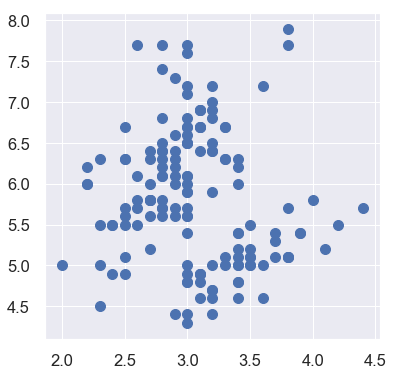

In [3]:
plt.rcParams['figure.figsize'] = [6, 6] #set size of the figures
plt.scatter(x=data['sepal_width'],
            y=data['sepal_length'], s=100) 
# scatter of two attributes

We encode a third attribute with size channel:

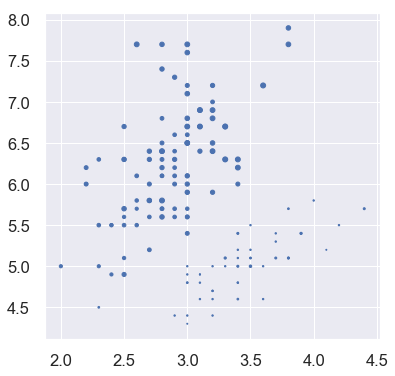

In [4]:
plt.scatter(x=data['sepal_width'], 
            y=data['sepal_length'], 
            s=data['petal_width']*10)

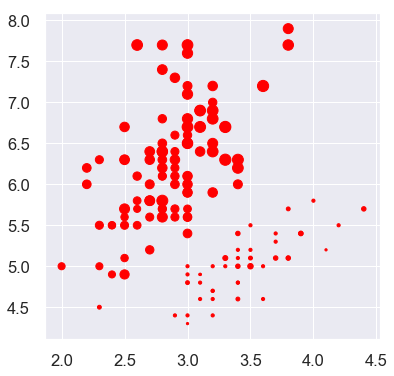

In [5]:
plt.scatter(x=data['sepal_width'], y=data['sepal_length'], s=data['petal_width']*50, c='red') #change scale for size

Finally, encode the 4th attribute with color:

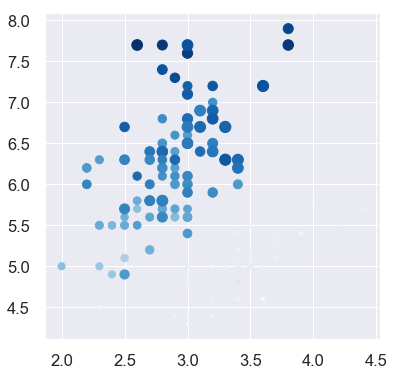

In [6]:
mycmap = plt.get_cmap('Blues')
plt.scatter(x=data['sepal_width'], 
            y=data['sepal_length'], 
            s=data['petal_width']*50, 
            c=data['petal_length'], cmap=mycmap) 

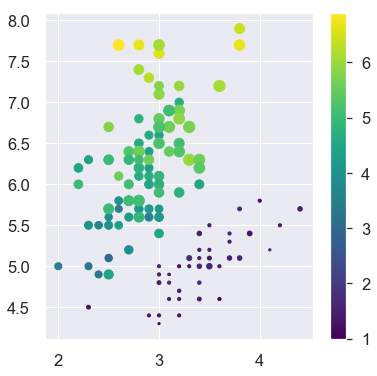

In [7]:
mycmap = plt.get_cmap('viridis') #use a better colormap to improve readability
plt.scatter(x=data['sepal_width'], y=data['sepal_length'], 
            s=data['petal_width']*50, c=data['petal_length'], cmap=mycmap) 
plt.colorbar()

However, size is not accurate and color interacts with size: the result is poor.

With hundreds of points and 4 quantitative attributes we need a scatter 
plot matrix using [seaborn.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) 

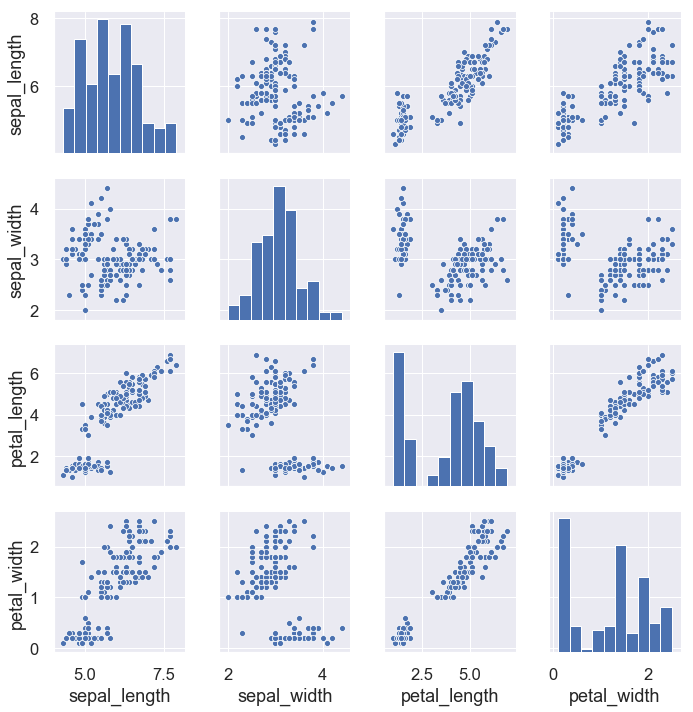

In [8]:
sns.pairplot(data)

Now we can also use color to encode species:

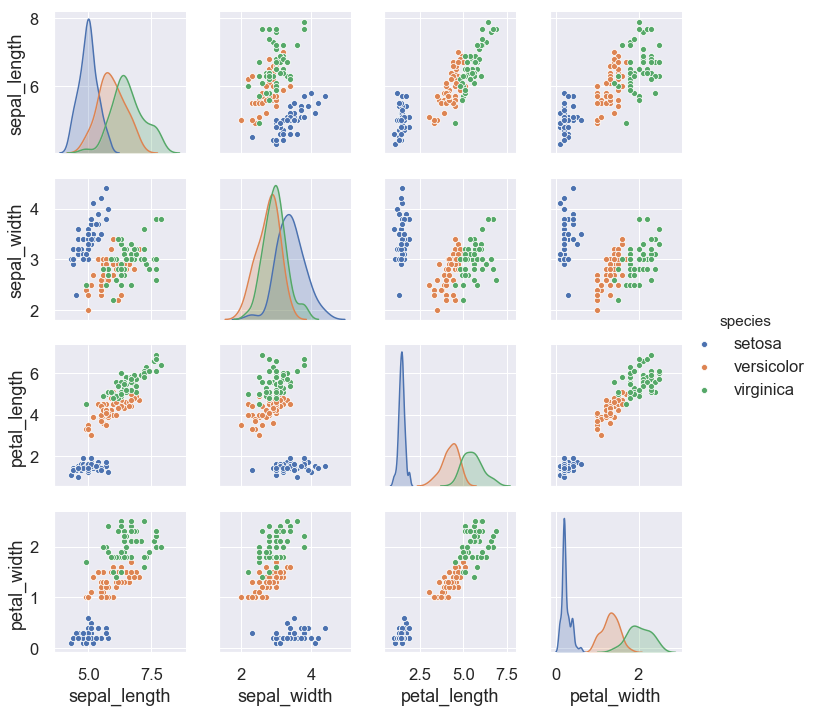

In [9]:
sns.pairplot(data, hue='species')

Now remove repeated plots:

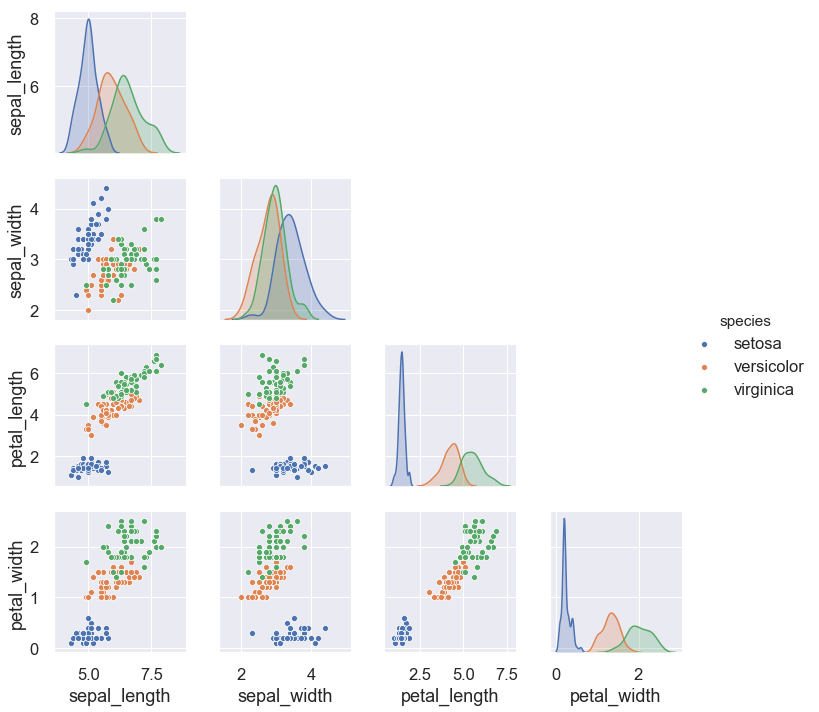

In [10]:
g = sns.pairplot(data, hue='species')
g.axes[0,1].set_visible(False)
g.axes[0,2].set_visible(False)
g.axes[0,3].set_visible(False)
g.axes[1,2].set_visible(False)
g.axes[1,3].set_visible(False)
g.axes[2,3].set_visible(False)

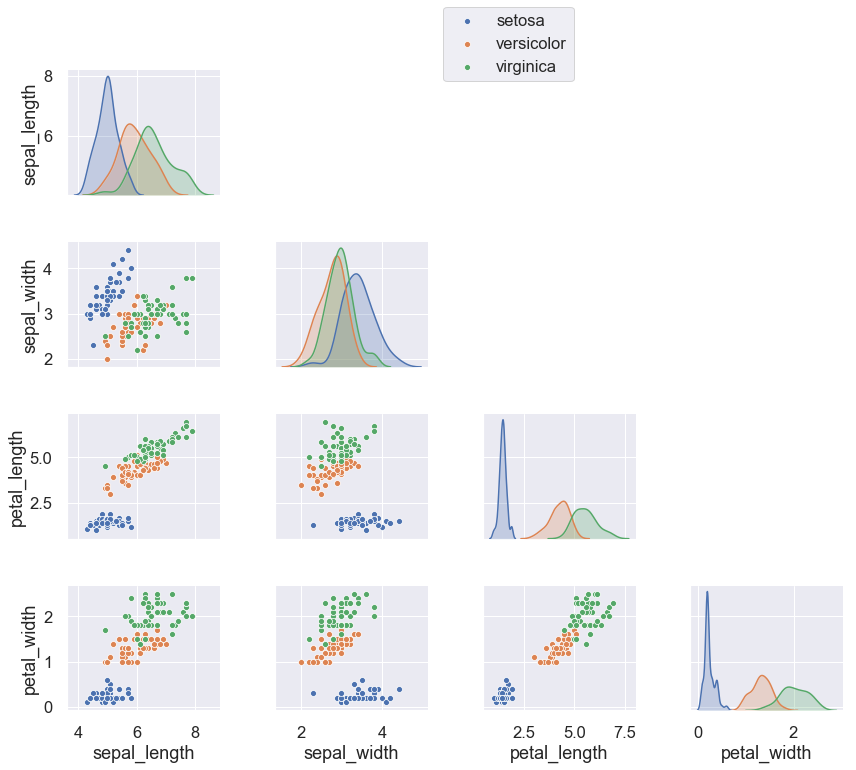

In [11]:
g = sns.pairplot(data, hue='species')
g.axes[0,1].set_visible(False)
g.axes[0,2].set_visible(False)
g.axes[0,3].set_visible(False)
g.axes[1,2].set_visible(False)
g.axes[1,3].set_visible(False)
g.axes[2,3].set_visible(False)
g._legend.remove()
plt.tight_layout()
g.axes[1,0].legend(bbox_to_anchor=(.5,.95), bbox_transform = g.fig.transFigure, loc=3)



## Correlation between attributes

Analysis of attribute correlations using [parallel_coordinates()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.parallel_coordinates.html#pandas.plotting.parallel_coordinates)

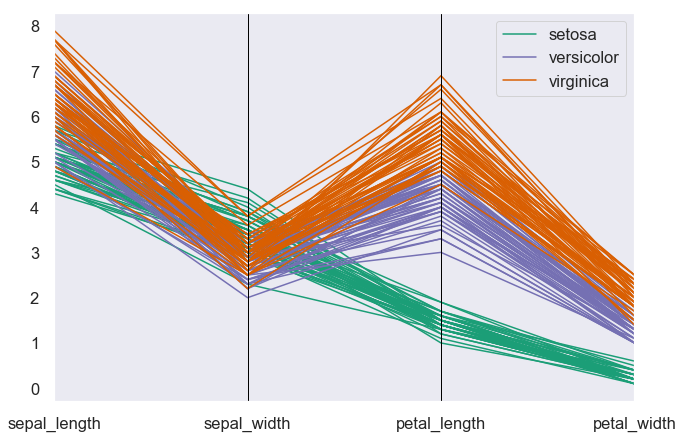

In [12]:
import pandas.plotting as pdplt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
sns.set(font_scale=1.5)

pdplt.parallel_coordinates(data, 'species', color=('#1b9e77','#d95f02','#7570b3'), sort_labels=True)

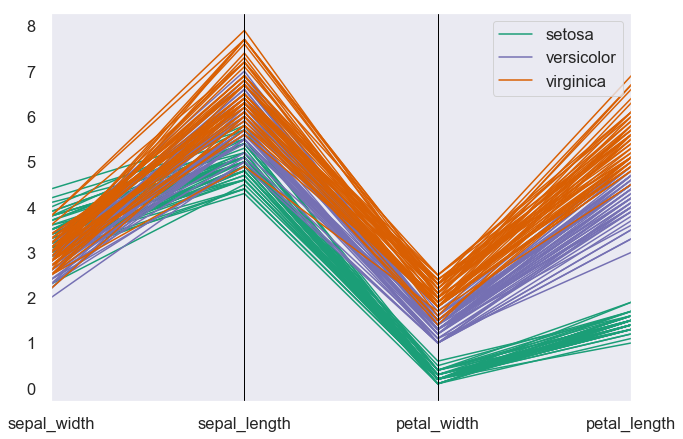

In [13]:
pdplt.parallel_coordinates(data, 'species', 
                     cols=['sepal_width','sepal_length', 'petal_width','petal_length'], 
                     color=('#1b9e77','#d95f02','#7570b3'),sort_labels='True')

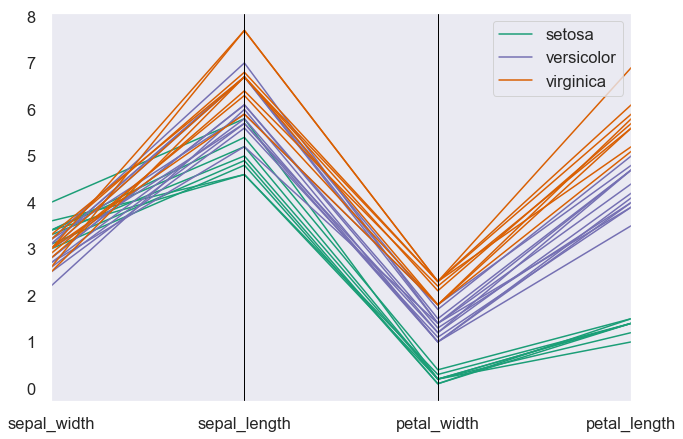

In [14]:
pdplt.parallel_coordinates(data.sample(frac=0.2).sort_values('species'), 'species',
                     cols=['sepal_width','sepal_length', 'petal_width','petal_length'], 
                     color=('#1b9e77','#d95f02','#7570b3'), sort_labels=True)

Multivariate analysis using the [radviz()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.radviz.html?highlight=radviz#pandas.plotting.radviz) function:

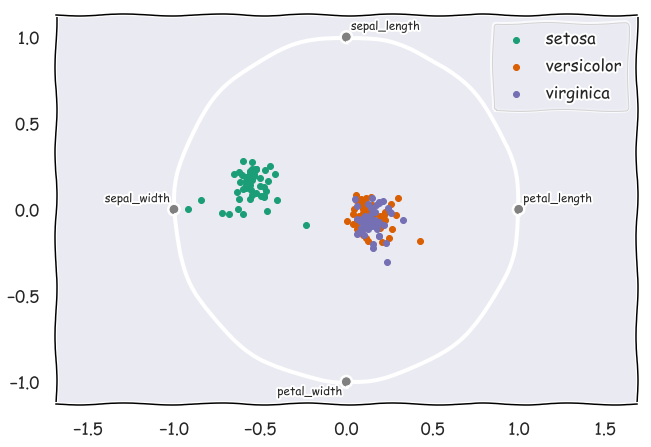

In [15]:
with plt.xkcd():
    plt.rcParams['font.family'] = ['Humor Sans', 'Comic Sans MS']
    pdplt.radviz(data[['petal_length','sepal_length','sepal_width','petal_width','species']], "species", color=('#1b9e77','#d95f02','#7570b3'))